In [1]:
!pip install seaborn
!pip install statsmodels
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# Load dataset
boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

# Verify data
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


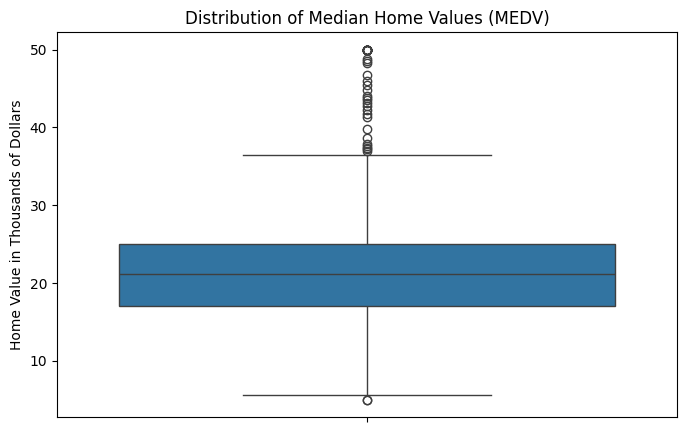

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Distribution of Median Home Values (MEDV)")
plt.ylabel("Home Value in Thousands of Dollars")
plt.show()

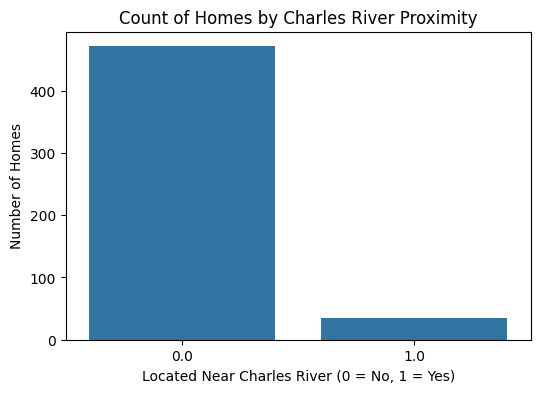

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x=boston_df['CHAS'])
plt.title("Count of Homes by Charles River Proximity")
plt.xlabel("Located Near Charles River (0 = No, 1 = Yes)")
plt.ylabel("Number of Homes")
plt.show()

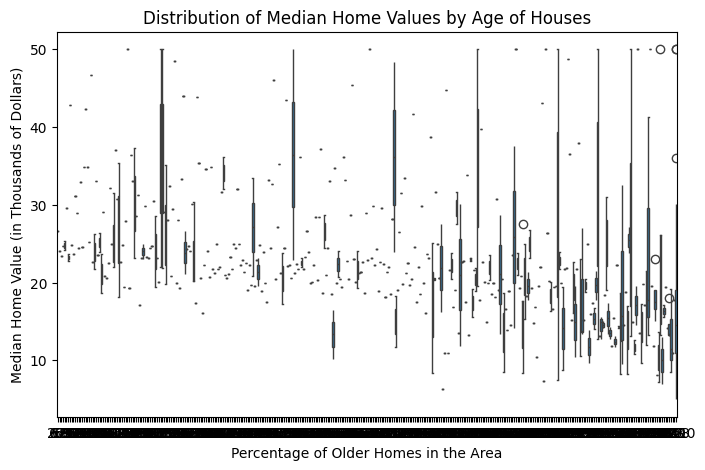

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x=boston_df['AGE'], y=boston_df['MEDV'])
plt.title("Distribution of Median Home Values by Age of Houses")
plt.xlabel("Percentage of Older Homes in the Area")
plt.ylabel("Median Home Value (in Thousands of Dollars)")
plt.show()

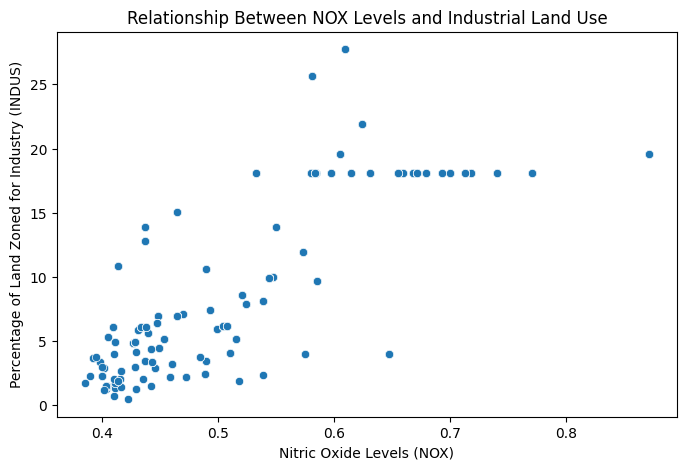

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title("Relationship Between NOX Levels and Industrial Land Use")
plt.xlabel("Nitric Oxide Levels (NOX)")
plt.ylabel("Percentage of Land Zoned for Industry (INDUS)")
plt.show()

Text(0, 0.5, 'Number of Observations')

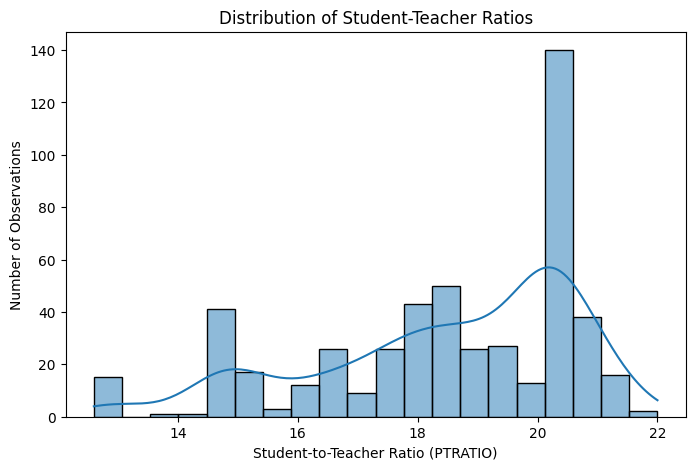

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title("Distribution of Student-Teacher Ratios")
plt.xlabel("Student-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Number of Observations")

In [9]:
model = ols("MEDV ~ DIS", data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        19:18:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0